In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Max-tree and attribute filtering

![](img/max_pruning.png)

## 0. Setup: Load the DSM tile

- Load the dsm tile `tile_path` 

In [2]:
tile_path = Path('data/dsm_vox_50cm_tile_-11_0.tif')

dsm = rio.open(tile_path).read(1)

## 1. Create the max-tree of the DSM with the Python package `sap`

- Create the max-tree of `dsm` (tip: don't forget that you can display docstrings with `?<package>`!)
- How many nodes have the max-tree?

In [3]:
# Your turn!
# create max tree of dsm
from sap import trees
max_tree = sap.MaxTree(dsm)

# number of nodes
nodes = max_tree.num_nodes
print('number of nodes:', nodes)

number of nodes: <bound method Tree.num_nodes of MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (2001, 2001),
 'image_hash': '6ebb69b8',
 'image_name': None,
 'num_nodes': 6144186}>


## 2. Compute some attributes on the max-tree

- Get the nodes `area` attribute in a vector.
- Get the nodes `compactness` attributes.
- What is the size of the attribute vectors? Why?

In [4]:
# Your turn!
area = max_tree.get_attribute('area')
print("Area vector:", area)
print("Number of nodes:", area.size)

Area vector: [1.000000e+00 1.000000e+00 1.000000e+00 ... 4.002815e+06 4.002817e+06
 4.004001e+06]
Number of nodes: 6144186


In [5]:
compactness = max_tree.get_attribute('compactness')
print("Compactness vector:", compactness)
print('nodes compactness:', compactness.size)

Compactness vector: [1.         1.         1.         ... 0.42332633 0.42332654 1.        ]
nodes compactness: 6144186


## 3. Filter the DSM with attribute filtering!

We'll filter the DTM with a threshold on the area attributes.

+ Choose an area threshold
+ Get the vector of deleted nodes
+ Filter the tree according to the vector of deleted nodes
+ Display!

Number of nodes to delete: 5584726


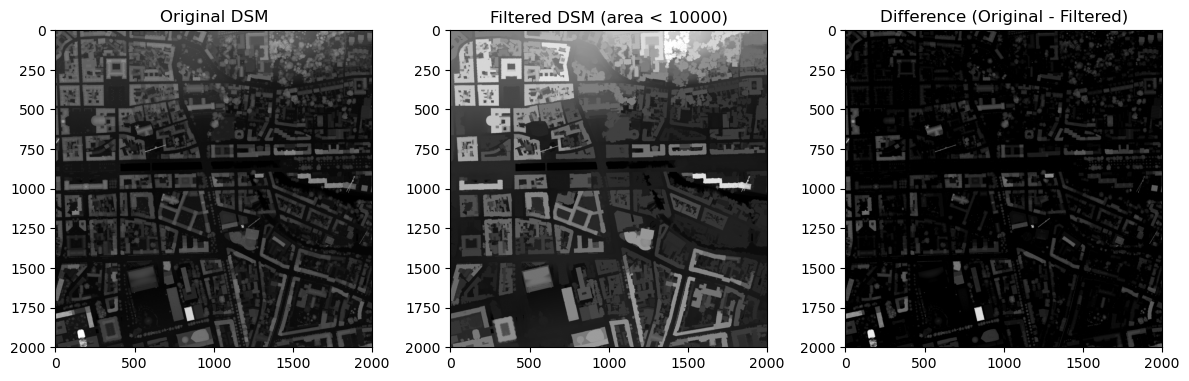

In [6]:
# area pixels threshold
threshold = 10000

# Create a boolean mask for nodes to delete (area >= threshold)
deleted_nodes = area < threshold
print("Number of nodes to delete:", np.sum(deleted_nodes))

# Reconstruct the filtered DSM
filtered_dsm = max_tree.reconstruct(deleted_nodes)

# display
plt.figure(figsize=(12, 5))

# Original DSM
plt.subplot(1, 3, 1)
plt.imshow(dsm, cmap='gray')
plt.title('Original DSM')

# Filtered DSM
plt.subplot(1, 3, 2)
plt.imshow(filtered_dsm, cmap='gray')
plt.title(f'Filtered DSM (area < {threshold})')

# difference image
diff = dsm - filtered_dsm
plt.subplot(1,3,3)
plt.imshow(diff, cmap='gray')
plt.title('Difference (Original - Filtered)')

plt.tight_layout()
plt.show()